[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Assignments/Stat_220_HW7.ipynb)

**Problem 1**: Consider the data set on bike share counts in Seoul Korea. You can read in the data using



bikes = pd.read_csv("https://richardson.byu.edu/220/bikes.csv")

Counts is the number of bicycles rented during the lunch hour each day. The continuous predictors are Temperature, Humidity, Wind_speed, Visibility and Rainfall. Seasons is a categorical variable with multiple levels and Holiday is a categorical variable with two levels.

Part a. Split the data into a training and test set.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

bikes = pd.read_csv("https://richardson.byu.edu/220/bikes.csv")
bikes.head(10)

Count  Temperature  Humidity  Wind_speed  Visibility  Rainfall Seasons  \
0    449          1.7        23         1.4        2000       0.0  Winter   
1    479          4.3        41         1.3        1666       0.0  Winter   
2    333          5.8        85         1.7         349       0.0  Winter   
3    393         -0.3        38         4.8        1823       0.0  Winter   
4    321         -2.3        25         0.0        1962       0.0  Winter   
5    405          2.4        52         0.9        1224       0.0  Winter   
6    431          3.7        65         2.4         833       0.0  Winter   
7    355         -2.0        30         1.4        1728       0.0  Winter   
8    427          2.4        40         0.8        1809       0.0  Winter   
9    119          2.3        88         0.3         245       0.0  Winter   

      Holiday  
0  No Holiday  
1  No Holiday  
2  No Holiday  
3  No Holiday  
4  No Holiday  
5  No Holiday  
6  No Holiday  
7  No Holiday  
8  No Holiday  
9  No Holiday

In [16]:
X = pd.get_dummies(bikes[["Temperature","Humidity", "Wind_speed", "Visibility", "Rainfall", "Seasons", "Holiday"]],drop_first = True)
y = bikes.Count

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

print(y_train.mean())
print(y_test.mean())

706.9450980392157
682.0454545454545


Part b.  Build a linear regression model for the training data using all the predictors in the model with Count as the target variable.  Remove all predictors from the model with a P-Value greater than 0.05. What predictors are left?

In [17]:
import statsmodels.formula.api as smf

bikes_clean = bikes.rename(columns=lambda x: x.replace('.', '_'))
bikes_clean['Seasons_adjusted'] = bikes_clean['Seasons'].replace({'Spring': 'Autumn', 'Summer': 'Autumn'})

bikes_train, bikes_test = train_test_split(bikes_clean, test_size=0.2, random_state=42)


formula = 'Count ~ Temperature + Humidity + Rainfall + Seasons_adjusted'



model_sm = smf.ols(formula, data=bikes_clean).fit()

print("Coefficients:")
print(model_sm.params)
model_sm.summary()




Coefficients:
Intercept                     952.272401
Seasons_adjusted[T.Winter]   -398.323480
Temperature                    12.165978
Humidity                       -7.022075
Rainfall                      -50.413119
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     93.76
Date:                Thu, 13 Nov 2025   Prob (F-statistic):           1.46e-54
Time:                        23:20:48   Log-Likelihood:                -2601.0
No. Observations:                 365   AIC:                             5212.
Df Residuals:                     360   BIC:                             5232.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    952.2724     63.877     14.908      0.000     826.653    1077.892
Seasons_adjusted[T.Winter]  -398.3235     58.309     -6.831      0.000    -512.993    -283.654
Temperature                   12.1660      2.125      5.725      0.000       7.987      16.345
Humidity                      -7.0221      0.990     -7.090      0.000      -8.970      -5.074
Rainfall                     -50.4131     19.047     -2.647      0.008     -87.871     -12.955
==============================================================================
Omnibus:                       21.681   Durbin-Watson:                   1.439
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.901
Skew:                          -0.448   Prob(JB):                     1.95e-07
Kurtosis:                       4.108   Cond. No.                         267.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Part c. Instead of removing all predictors with a P-Value greater than 0.05, remove the largest P-Value and refit, the repeat that process until all the predictors that remain are significant (have P-Values greater than 0.05). What predictors are left in the model?

In [18]:
mod_exp1 = smf.ols("Count ~ Temperature + Humidity + Wind_speed	+ Visibility + Rainfall + Seasons	+ Holiday",bikes_clean).fit()
mod_exp1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     42.39
Date:                Thu, 13 Nov 2025   Prob (F-statistic):           3.77e-51
Time:                        23:20:48   Log-Likelihood:                -2598.1
No. Observations:                 365   AIC:                             5216.
Df Residuals:                     355   BIC:                             5255.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              1018.2527    136.454      7.462      0.000     749.892    1286.614
Seasons[T.Spring]        -1.8925     46.890     -0.040      0.968     -94.110      90.325
Seasons[T.Summer]       -98.6940     57.978     -1.702      0.090    -212.718      15.330
Seasons[T.Winter]      -357.2311     69.768     -5.120      0.000    -494.442    -220.021
Holiday[T.No Holiday]    -9.3633     74.691     -0.125      0.900    -156.256     137.530
Temperature              16.0382      2.950      5.437      0.000      10.237      21.839
Humidity                 -7.5590      1.146     -6.595      0.000      -9.813      -5.305
Wind_speed               -4.9464     16.875     -0.293      0.770     -38.133      28.241
Visibility               -0.0446      0.036     -1.233      0.218      -0.116       0.027
Rainfall                -51.0743     19.266     -2.651      0.008     -88.964     -13.184
==============================================================================
Omnibus:                       29.254   Durbin-Watson:                   1.451
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.190
Skew:                          -0.512   Prob(JB):                     2.08e-11
Kurtosis:                       4.478   Cond. No.                     1.49e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
mod_exp1 = smf.ols("Count ~ Temperature + Humidity + Wind_speed	+ Visibility + Rainfall	+ Holiday",bikes_clean).fit()
mod_exp1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     48.64
Date:                Thu, 13 Nov 2025   Prob (F-statistic):           1.50e-43
Time:                        23:20:48   Log-Likelihood:                -2622.5
No. Observations:                 365   AIC:                             5259.
Df Residuals:                     358   BIC:                             5286.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               727.0229    120.336      6.042      0.000     490.370     963.676
Holiday[T.No Holiday]    26.5224     78.768      0.337      0.737    -128.383     181.428
Temperature              23.5413      1.525     15.433      0.000      20.542      26.541
Humidity                 -7.2406      1.203     -6.021      0.000      -9.606      -4.875
Wind_speed               -0.0661     17.468     -0.004      0.997     -34.418      34.286
Visibility               -0.0436      0.037     -1.166      0.244      -0.117       0.030
Rainfall                -46.2998     20.448     -2.264      0.024     -86.512      -6.087
==============================================================================
Omnibus:                        6.512   Durbin-Watson:                   1.256
Prob(Omnibus):                  0.039   Jarque-Bera (JB):                6.481
Skew:                          -0.267   Prob(JB):                       0.0391
Kurtosis:                       3.376   Cond. No.                     1.23e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
mod_exp1 = smf.ols("Count ~ Temperature + Humidity	+ Visibility + Rainfall + Holiday",bikes_clean).fit()
mod_exp1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     58.53
Date:                Thu, 13 Nov 2025   Prob (F-statistic):           1.86e-44
Time:                        23:20:48   Log-Likelihood:                -2622.5
No. Observations:                 365   AIC:                             5257.
Df Residuals:                     359   BIC:                             5280.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               726.9064    116.160      6.258      0.000     498.467     955.346
Holiday[T.No Holiday]    26.5187     78.652      0.337      0.736    -128.158     181.195
Temperature              23.5420      1.512     15.569      0.000      20.568      26.516
Humidity                 -7.2406      1.201     -6.029      0.000      -9.602      -4.879
Visibility               -0.0436      0.037     -1.181      0.238      -0.116       0.029
Rainfall                -46.2966     20.403     -2.269      0.024     -86.420      -6.173
==============================================================================
Omnibus:                        6.510   Durbin-Watson:                   1.256
Prob(Omnibus):                  0.039   Jarque-Bera (JB):                6.479
Skew:                          -0.267   Prob(JB):                       0.0392
Kurtosis:                       3.376   Cond. No.                     1.20e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
mod_exp1 = smf.ols("Count ~ Temperature + Humidity	+ Visibility + Rainfall",bikes_clean).fit()
mod_exp1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     73.31
Date:                Thu, 13 Nov 2025   Prob (F-statistic):           2.15e-45
Time:                        23:20:48   Log-Likelihood:                -2622.6
No. Observations:                 365   AIC:                             5255.
Df Residuals:                     360   BIC:                             5275.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     750.8723     91.760      8.183      0.000     570.419     931.326
Temperature    23.5577      1.510     15.606      0.000      20.589      26.526
Humidity       -7.2078      1.196     -6.029      0.000      -9.559      -4.857
Visibility     -0.0439      0.037     -1.190      0.235      -0.116       0.029
Rainfall      -47.1385     20.224     -2.331      0.020     -86.911      -7.366
==============================================================================
Omnibus:                        6.782   Durbin-Watson:                   1.251
Prob(Omnibus):                  0.034   Jarque-Bera (JB):                6.704
Skew:                          -0.281   Prob(JB):                       0.0350
Kurtosis:                       3.353   Cond. No.                     8.59e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
mod_exp1 = smf.ols("Count ~ Temperature + Humidity + Rainfall",bikes_clean).fit()
mod_exp1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     97.17
Date:                Thu, 13 Nov 2025   Prob (F-statistic):           4.03e-46
Time:                        23:20:48   Log-Likelihood:                -2623.3
No. Observations:                 365   AIC:                             5255.
Df Residuals:                     361   BIC:                             5270.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     659.4893     50.271     13.119      0.000     560.628     758.350
Temperature    23.1597      1.473     15.724      0.000      20.263      26.056
Humidity       -6.5225      1.048     -6.222      0.000      -8.584      -4.461
Rainfall      -45.7674     20.203     -2.265      0.024     -85.498      -6.037
==============================================================================
Omnibus:                        7.414   Durbin-Watson:                   1.242
Prob(Omnibus):                  0.025   Jarque-Bera (JB):                7.379
Skew:                          -0.297   Prob(JB):                       0.0250
Kurtosis:                       3.362   Cond. No.                         161.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Part d. Regardless of whether or not you got the same set of predictors in problems 1 and 2, the two approaches can potentially give different results. Explain why.

When you take out the p-values one at a time, the significance of each coefficent changes with less variables. Thus, if a variable is over/under 0.05 at the beginning of the process, it can change and be under/over by the end of the process unlike at the beginning where they are all one number and won't change besides the end product.

Part e. Find the out of sample MSE for both the model with all predictors, the model with all variables with p values above 0.05 removed, and the model with variables removed 1 at a time. which model is best?

In [23]:
from sklearn.metrics import mean_squared_error

formula_all = 'Count ~ Temperature + Humidity + Wind_speed + Visibility + Rainfall + Seasons + Holiday'
model_all = smf.ols(formula_all, data=bikes_train).fit()
preds_all = model_all.predict(bikes_test)
mse_all = mean_squared_error(bikes_test['Count'], preds_all)
print(f"All: {mse_all}")

bikes_adjusted = bikes_train.copy()
bikes_adjusted.loc[bikes_adjusted['Seasons'] == 'Spring', 'Seasons'] = 'Autumn'
formula_adjusted = 'Count ~ Temperature + Humidity + Rainfall + C(Seasons, levels=["Autumn", "Summer", "Winter"])'
model_adjusted = smf.ols(formula_adjusted, data=bikes_adjusted).fit()
preds_adjusted = model_adjusted.predict(bikes_adjusted)
mse_adjusted = mean_squared_error(bikes_adjusted['Count'], preds_adjusted)
print(f"Variables with P-Value lower than 0.5: {mse_adjusted}")

formula_one = 'Count ~ Temperature + Humidity + Rainfall'
model_one = smf.ols(formula_one, data=bikes_train).fit()
preds_one = model_one.predict(bikes_test)
mse_one = mean_squared_error(bikes_test['Count'], preds_one)
print(f"Variables removed one at a time: {mse_one}")


mse_values = {
    "All variables Model": mse_all,
    "P>0.05 Removed Model": mse_adjusted,
    "One Removal At a Time Model": mse_one
}

best_model_name = min(mse_values, key=mse_values.get)
lowest_mse = mse_values[best_model_name]

print(f"\nThe model with the lowest out-of-sample MSE and is therefore the best is '{best_model_name}' with an MSE of {lowest_mse:.2f}.")

All: 77830.425209024
Variables with P-Value lower than 0.5: 94107.55611725787
Variables removed one at a time: 86259.63708681114

The model with the lowest out-of-sample MSE and is therefore the best is 'All variables Model' with an MSE of 77830.43.


**Problem 2** Use the same data as above and the same train-test split. Build a regression tree with a maximum depth of 2. Find the out of sample MSE.  

Part a. Build a regression tree with a maximum depth of 2. Find the out of sample MSE.

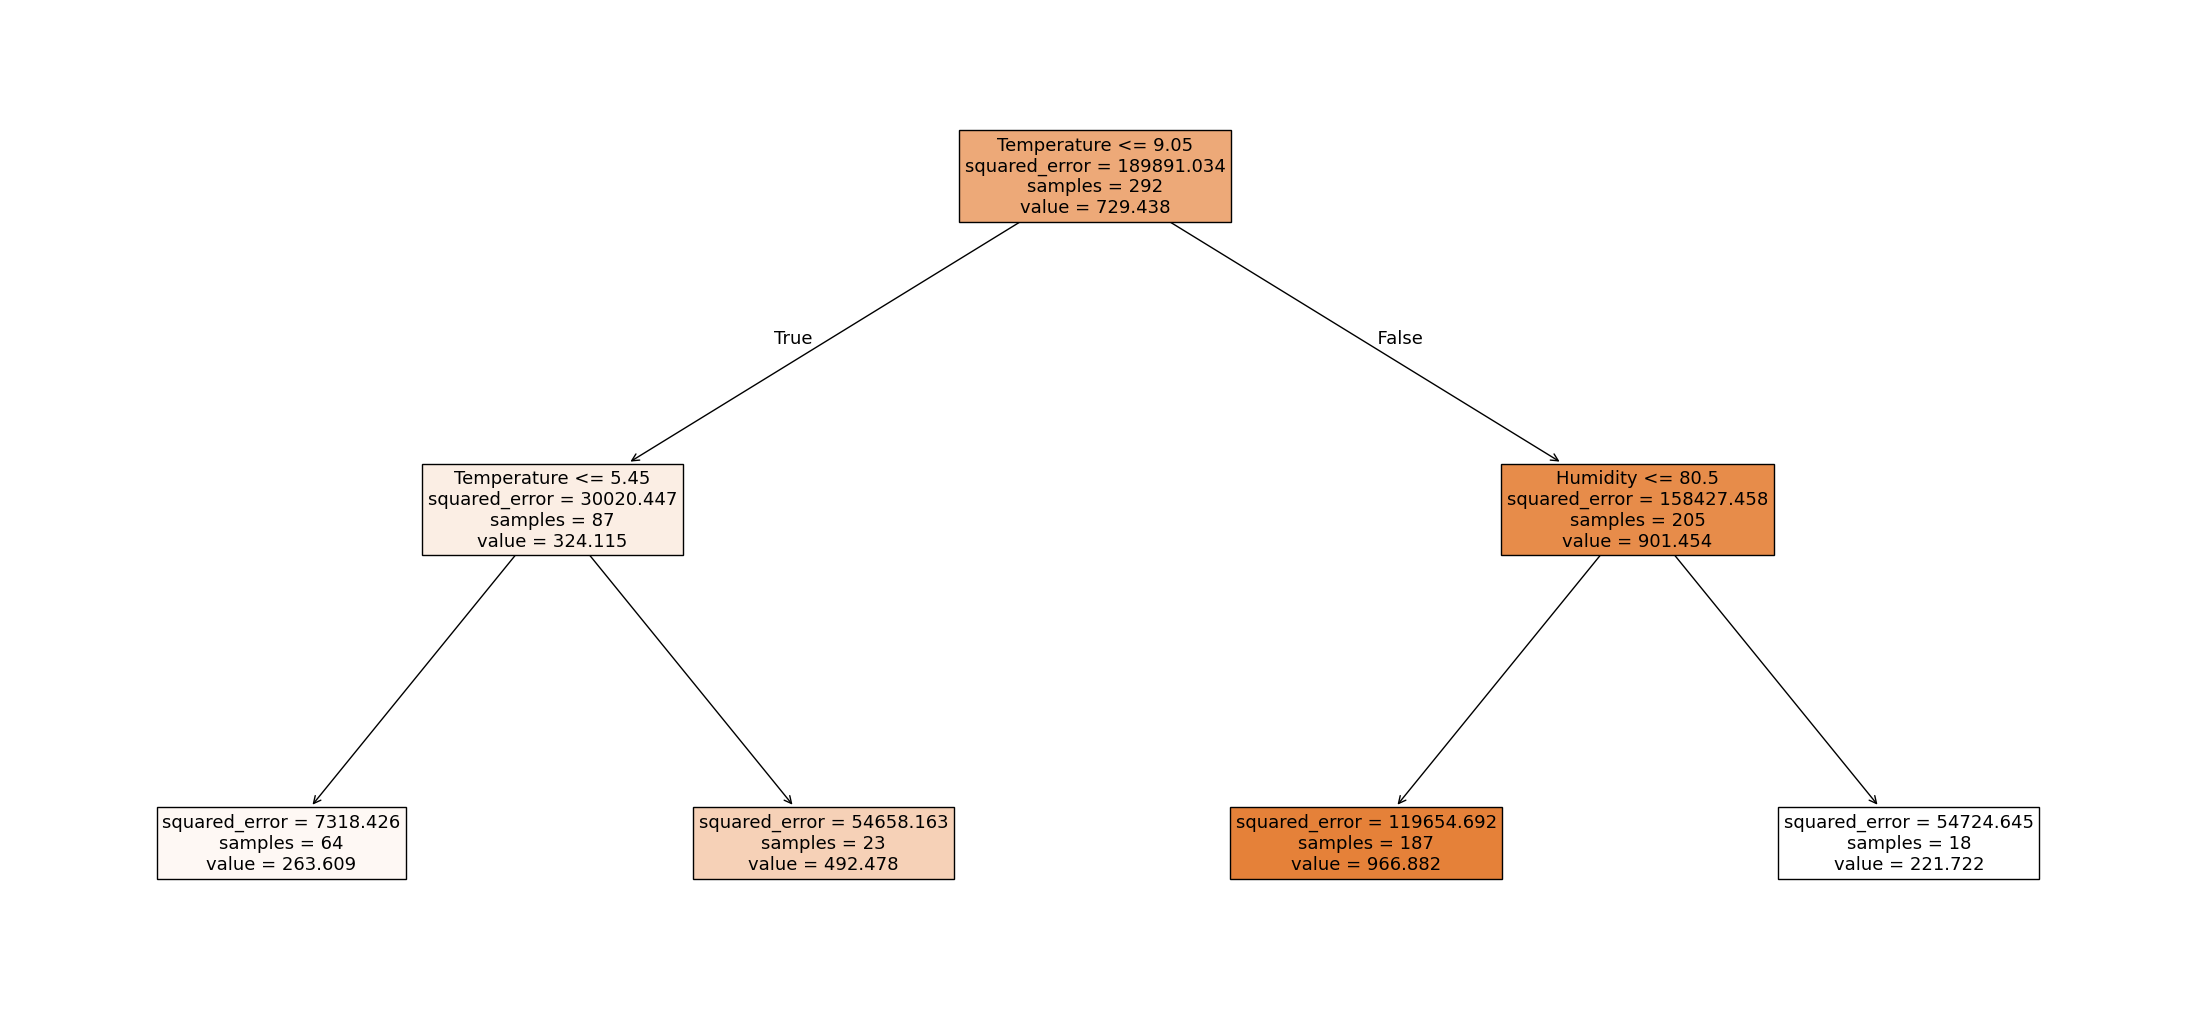

In [24]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn import tree

predictors = bikes_train[["Temperature", "Visibility", "Humidity", "Seasons", "Holiday", "Wind_speed"]]
X = pd.get_dummies(predictors, drop_first=True)
y = bikes_train["Count"]

decision_tree = DecisionTreeRegressor(max_depth=2)
mod_tree = decision_tree.fit(X, y)

plt.figure(figsize=(28, 13))
plot_tree(decision_tree, feature_names=X.columns, fontsize=13, filled=True)
plt.show()

in_sample_tree = mod_tree.predict(X)
rmse_tree_in = np.sqrt(mean_squared_error(y,in_sample_tree))



Part b. Increase the depth to 3, 4, 5, and 6. Check the out of sample MSE for each and report them.

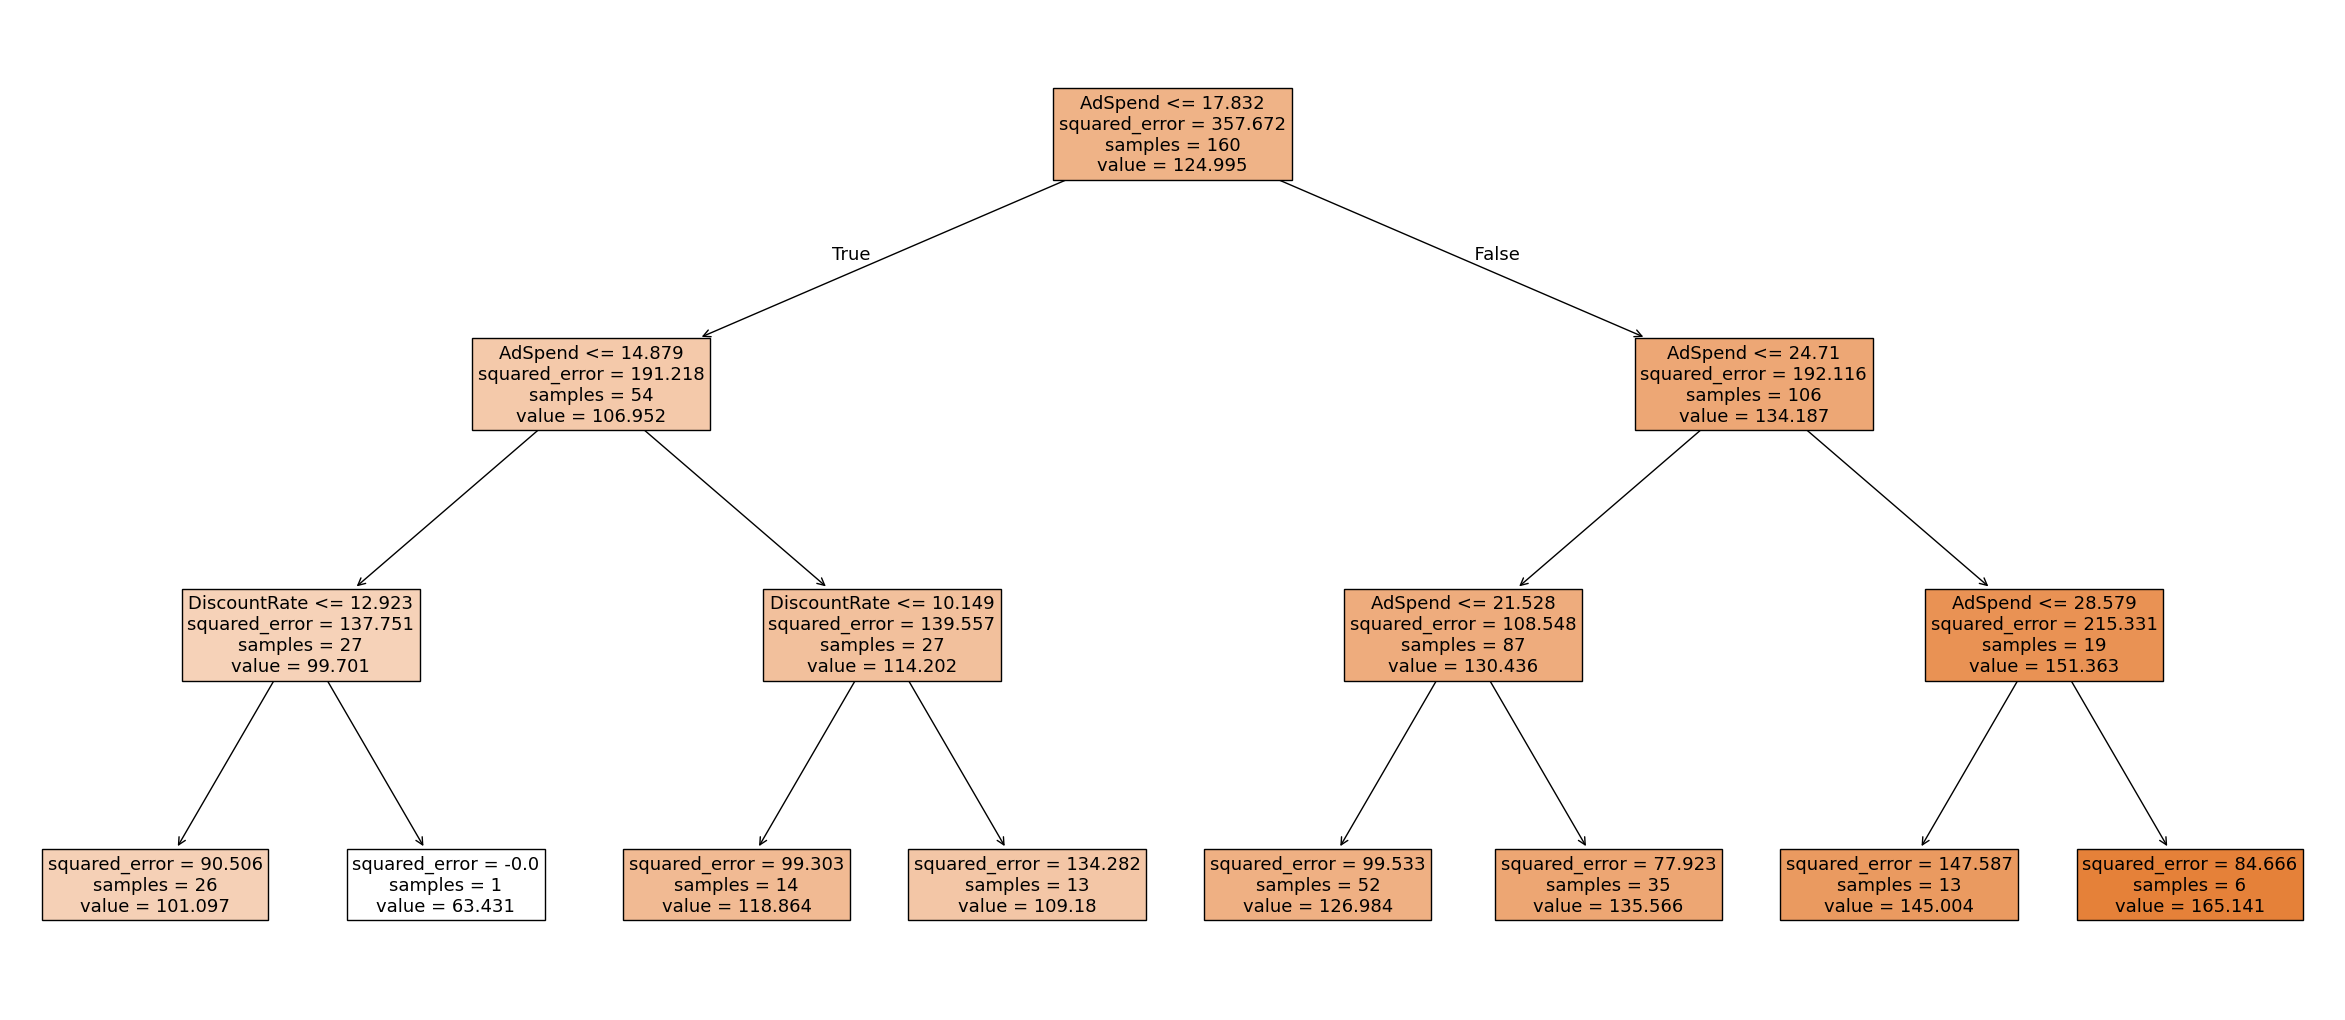

336.773370373538


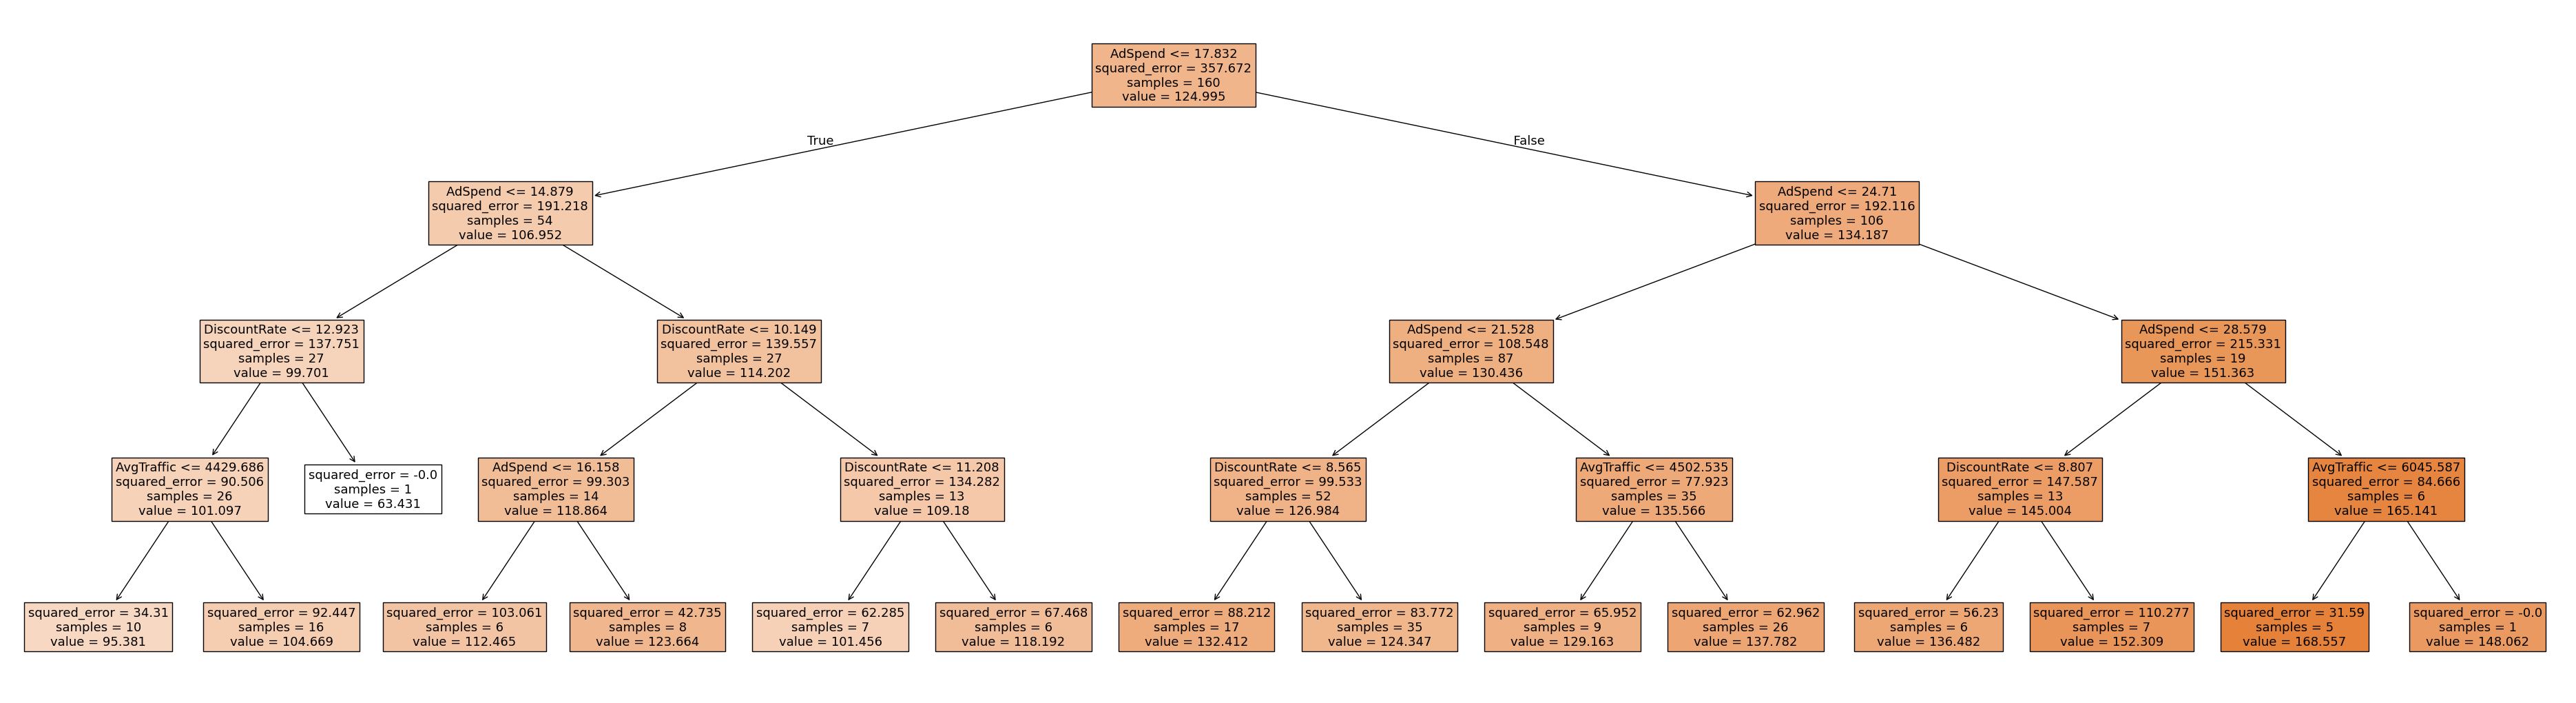

325.83072886310043


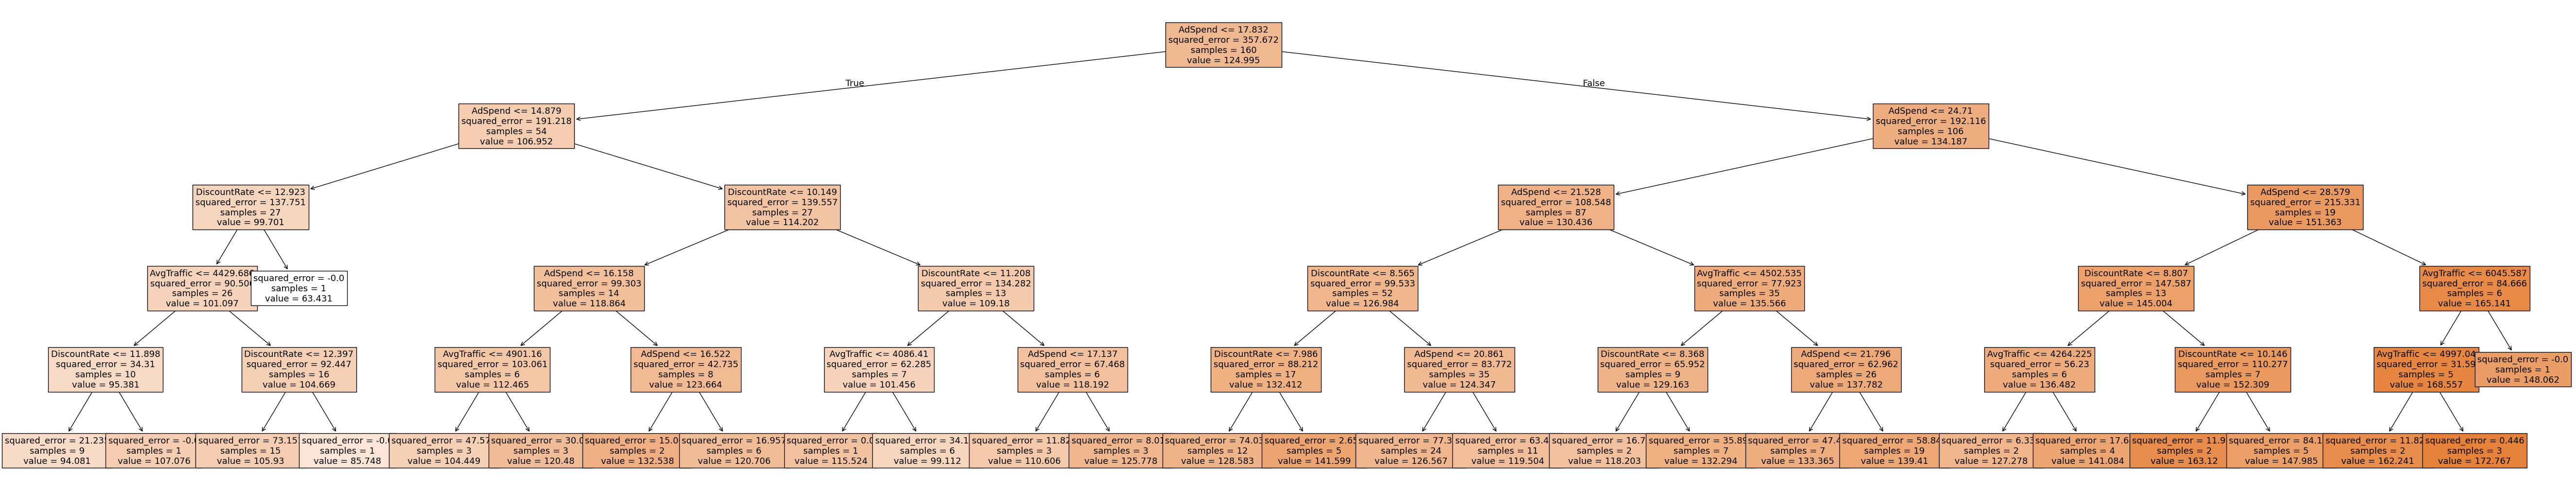

347.4508093206467


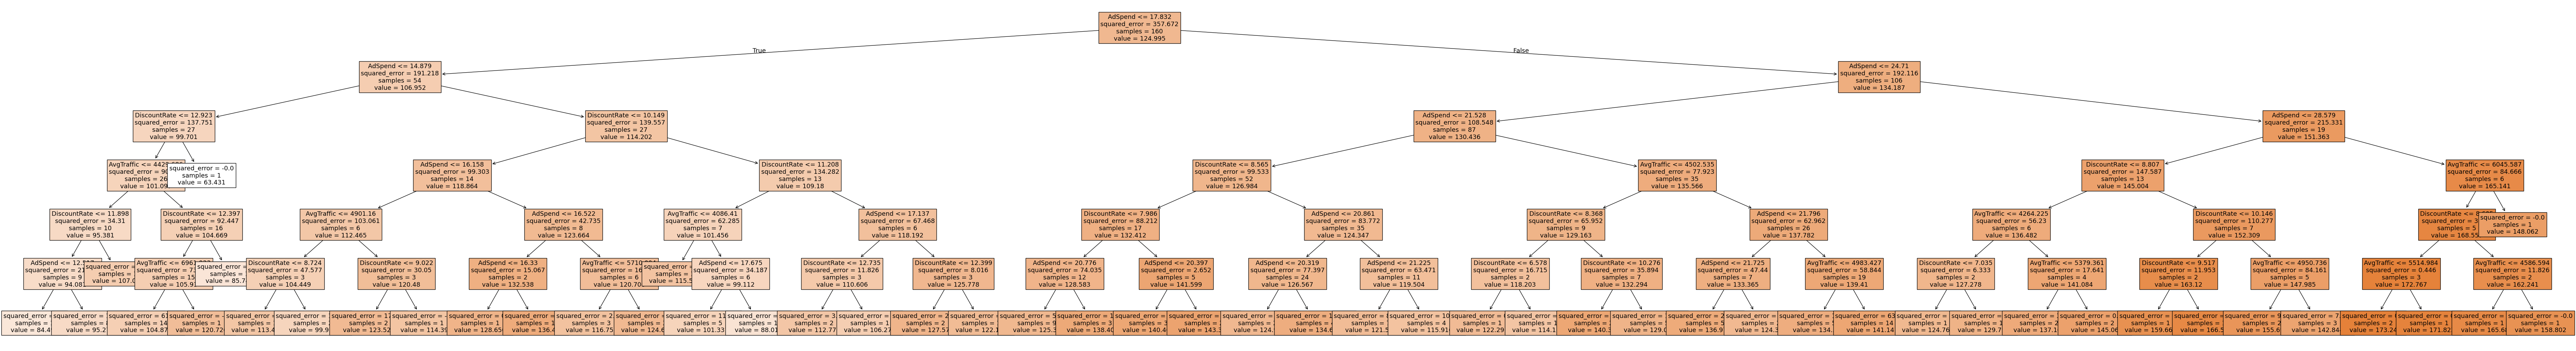

356.21835898914304


In [45]:
decision_tree = DecisionTreeRegressor(max_depth=3)
mod_tree = decision_tree.fit(X, y)
plt.figure(figsize=(30, 13))
plot_tree(decision_tree, feature_names=X.columns, fontsize=13, filled=True)
plt.show()
mod_tree2 = decision_tree.fit(X_train,y_train)
out_sample_tree = mod_tree2.predict(X_test)
rmse_tree_out = np.sqrt(mean_squared_error(y_test,out_sample_tree))
print(rmse_tree_out)

decision_tree2 = DecisionTreeRegressor(max_depth=4)
mod_tree = decision_tree2.fit(X, y)
plt.figure(figsize=(48, 13))
plot_tree(decision_tree2, feature_names=X.columns, fontsize=13, filled=True)
plt.show()
mod_tree2 = decision_tree2.fit(X_train,y_train)
out_sample_tree = mod_tree2.predict(X_test)
rmse_tree_out = np.sqrt(mean_squared_error(y_test,out_sample_tree))
print(rmse_tree_out)

decision_tree3 = DecisionTreeRegressor(max_depth=5)
mod_tree = decision_tree3.fit(X, y)
plt.figure(figsize=(68, 13))
plot_tree(decision_tree3, feature_names=X.columns, fontsize=13, filled=True)
plt.show()
mod_tree2 = decision_tree3.fit(X_train,y_train)
out_sample_tree = mod_tree2.predict(X_test)
rmse_tree_out = np.sqrt(mean_squared_error(y_test,out_sample_tree))
print(rmse_tree_out)

decision_tree4 = DecisionTreeRegressor(max_depth=6)
mod_tree = decision_tree4.fit(X, y)
plt.figure(figsize=(96, 13))
plot_tree(decision_tree4, feature_names=X.columns, fontsize=13, filled=True)
plt.show()
mod_tree2 = decision_tree4.fit(X_train,y_train)
out_sample_tree = mod_tree2.predict(X_test)
rmse_tree_out = np.sqrt(mean_squared_error(y_test,out_sample_tree))
print(rmse_tree_out)


Part c. Based on the out of sample MSE, which depth is best?

The best depth is 4 since it has the lowest out of sample MSE of 325.8.

**Problem 3** Explain why using out of sample metrics is important for finding the best model as opposed to using in sample metrics. Out of all the models, both regression tree and linear regression models, which is the best model using out-of-sample MSE.

Using in sample metrics will measure how the model fits the sample, but it is not a good measure of how well the model finds real relationships with new data added. If the model is still a good fit with new data, then it is a good fit which is found out from out sample metrics. The best model seems to be the regression tree with depth 6 since it has the lowest MSE of 212.5.

**Problem 4**: A store with an online presence collects revenue data by month. This data can be found at [richardson.byu.edu/220/revenue_data.csv](https://richardson.byu.edu/220/revenue_data.csv). The variable MonthlyRevenue is the target variable. Money spent on ads (AdSpend), site traffic (AvgTraffic), and discount rates (DiscountRate) are the variables.

Part a. Split this data into a training set and a test set.

In [26]:
from sklearn.model_selection import train_test_split

revenue = pd.read_csv("https://richardson.byu.edu/220/revenue_data.csv")
revenue.head(10)

AdSpend   AvgTraffic  DiscountRate  MonthlyRevenue
0  22.483571  5357.787360      6.811145      144.998391
1  19.308678  5560.784526      8.801250      117.707055
2  23.238443  6083.051243     10.010487      148.816156
3  27.615149  6053.802052     10.093961      166.576876
4  18.829233  3622.330632      9.099869      119.633833
5  18.829315  4062.174960     11.245700      134.321079
6  27.896064  5515.035267      7.864759      145.660717
7  23.837174  5513.785951      9.715241      126.918663
8  17.652628  5515.047686     10.240591      102.505329
9  22.712800  8852.731491     11.028878      166.333624

In [27]:
revenue_clean = revenue.rename(columns=lambda x: x.replace('.', '_'))

revenue_train, revenue_test = train_test_split(revenue_clean, test_size=0.2, random_state=42)

print(revenue_train.mean())
print(revenue_test.mean())

AdSpend             19.684648
AvgTraffic        5075.783241
DiscountRate         9.713218
MonthlyRevenue     124.995250
dtype: float64
AdSpend             20.242135
AvgTraffic        5126.207970
DiscountRate        10.290578
MonthlyRevenue     125.412765
dtype: float64


Part b. Fit a linear regression model on the training set. Report the p-values for each variable.

In [28]:
formula = 'MonthlyRevenue ~ AdSpend + AvgTraffic + DiscountRate'

model_sm = smf.ols(formula, data=revenue_clean).fit()

print("Coefficients:")
print(model_sm.params)
model_sm.summary()

Coefficients:
Intercept       45.952039
AdSpend          3.199102
AvgTraffic       0.003902
DiscountRate    -0.411822
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         MonthlyRevenue   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     162.9
Date:                Thu, 13 Nov 2025   Prob (F-statistic):           5.56e-53
Time:                        23:20:55   Log-Likelihood:                -744.75
No. Observations:                 200   AIC:                             1498.
Df Residuals:                     196   BIC:                             1511.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       45.9520      6.169      7.449      0.000      33.786      58.118
AdSpend          3.1991      0.156     20.476      0.000       2.891       3.507
AvgTraffic       0.0039      0.001      5.341      0.000       0.002       0.005
DiscountRate    -0.4118      0.364     -1.130      0.260      -1.130       0.307
==============================================================================
Omnibus:                        0.032   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.984   Jarque-Bera (JB):                0.139
Skew:                           0.010   Prob(JB):                        0.933
Kurtosis:                       2.872   Cond. No.                     4.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Part c. Interpret the p-value for AdSpend in the context of the problem. What does the value of that p-value imply for the relationship between these variables.

The p-value is 0 for AdSpend which implies that the chance that the relationship between money on ads spent and monthly revenue is random is 0.

Part d. Interpret the p-value for DiscountRate in the context of the problem. What does the value of that p-value imply for the relationship between these variables.

Thw P-Value for discount rate is 0.260 which means the relationship between monthly revenue and the discount rate is not significant. There is a 26% chance that the relationship is random.

**Problem 5** Using the same data as problem 4.

Part a. Build three regression tree models on the training data set with a max depths of 2, 3, and 5.

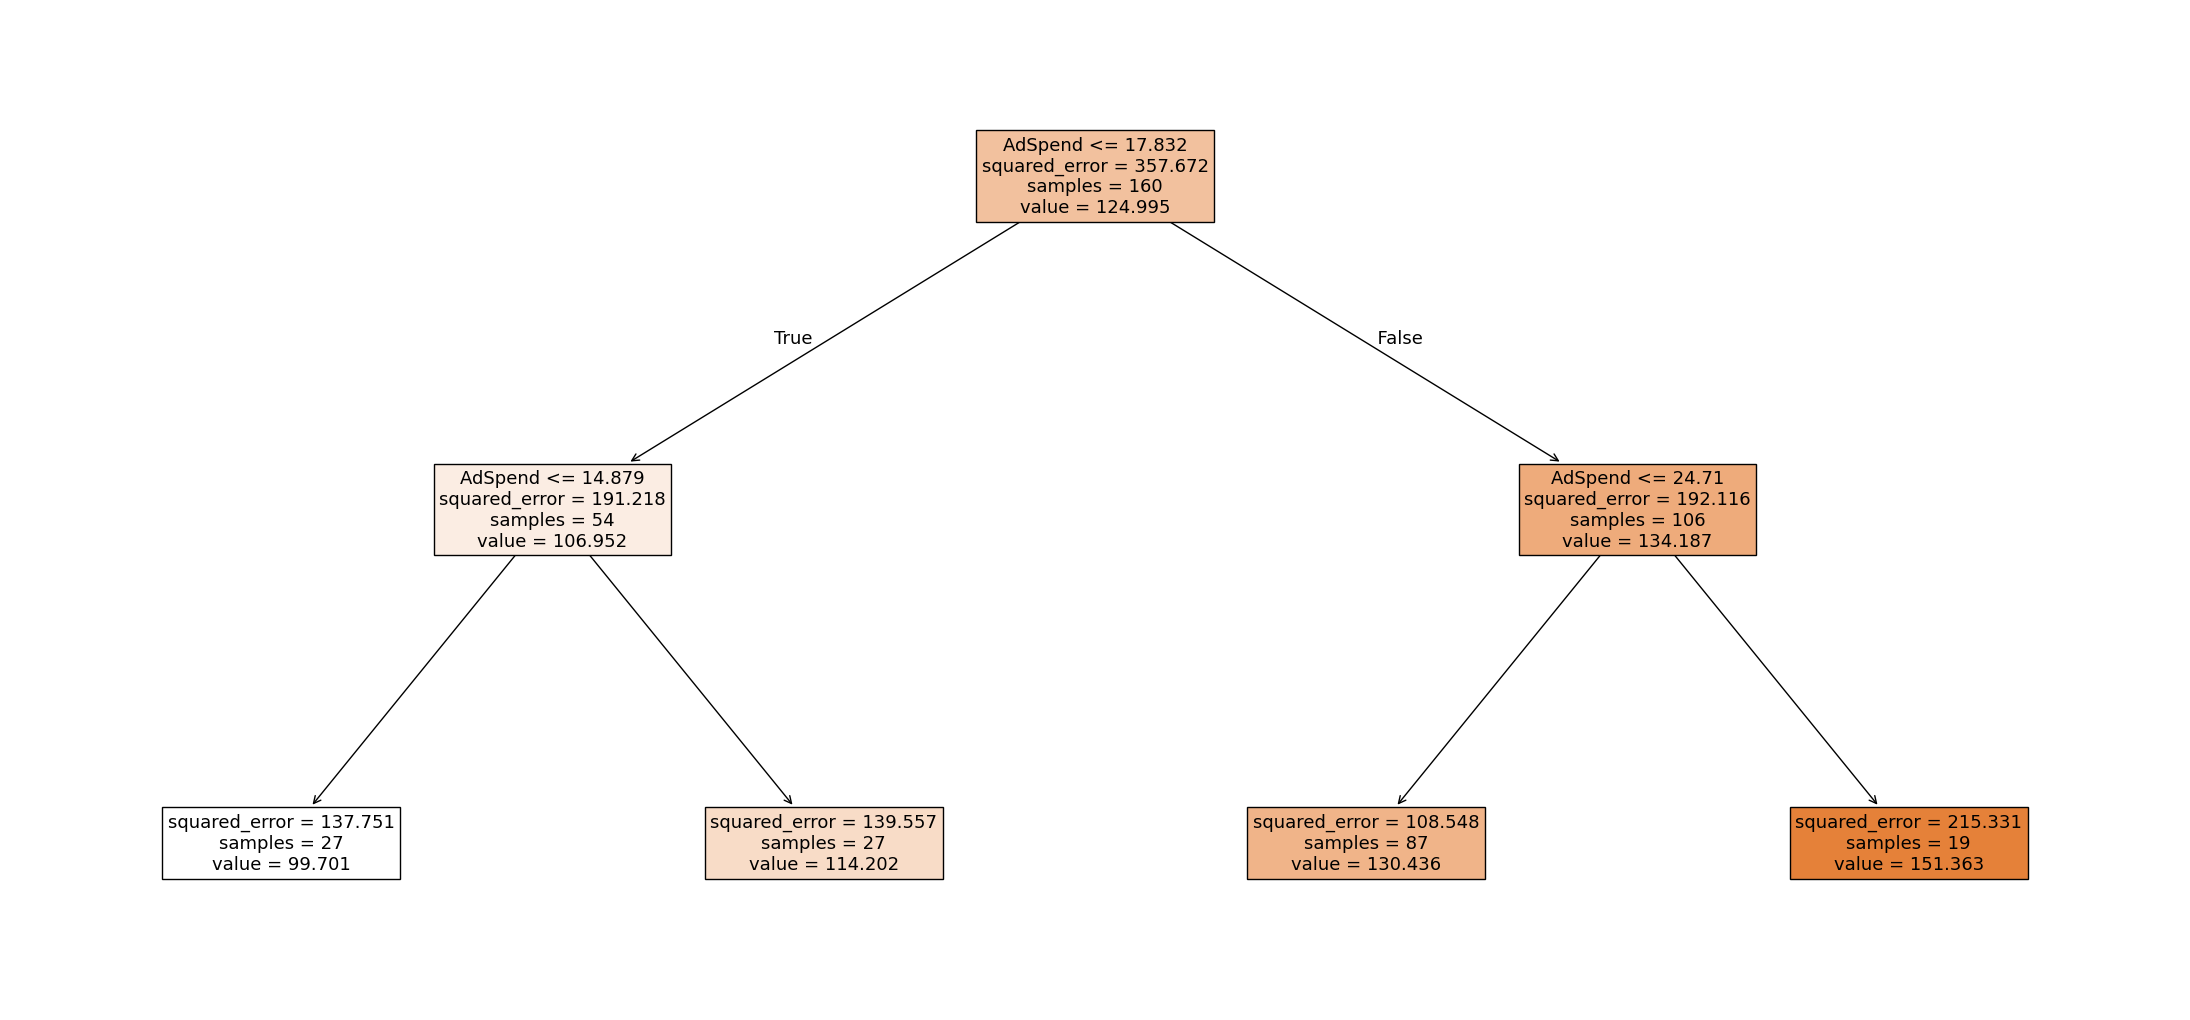

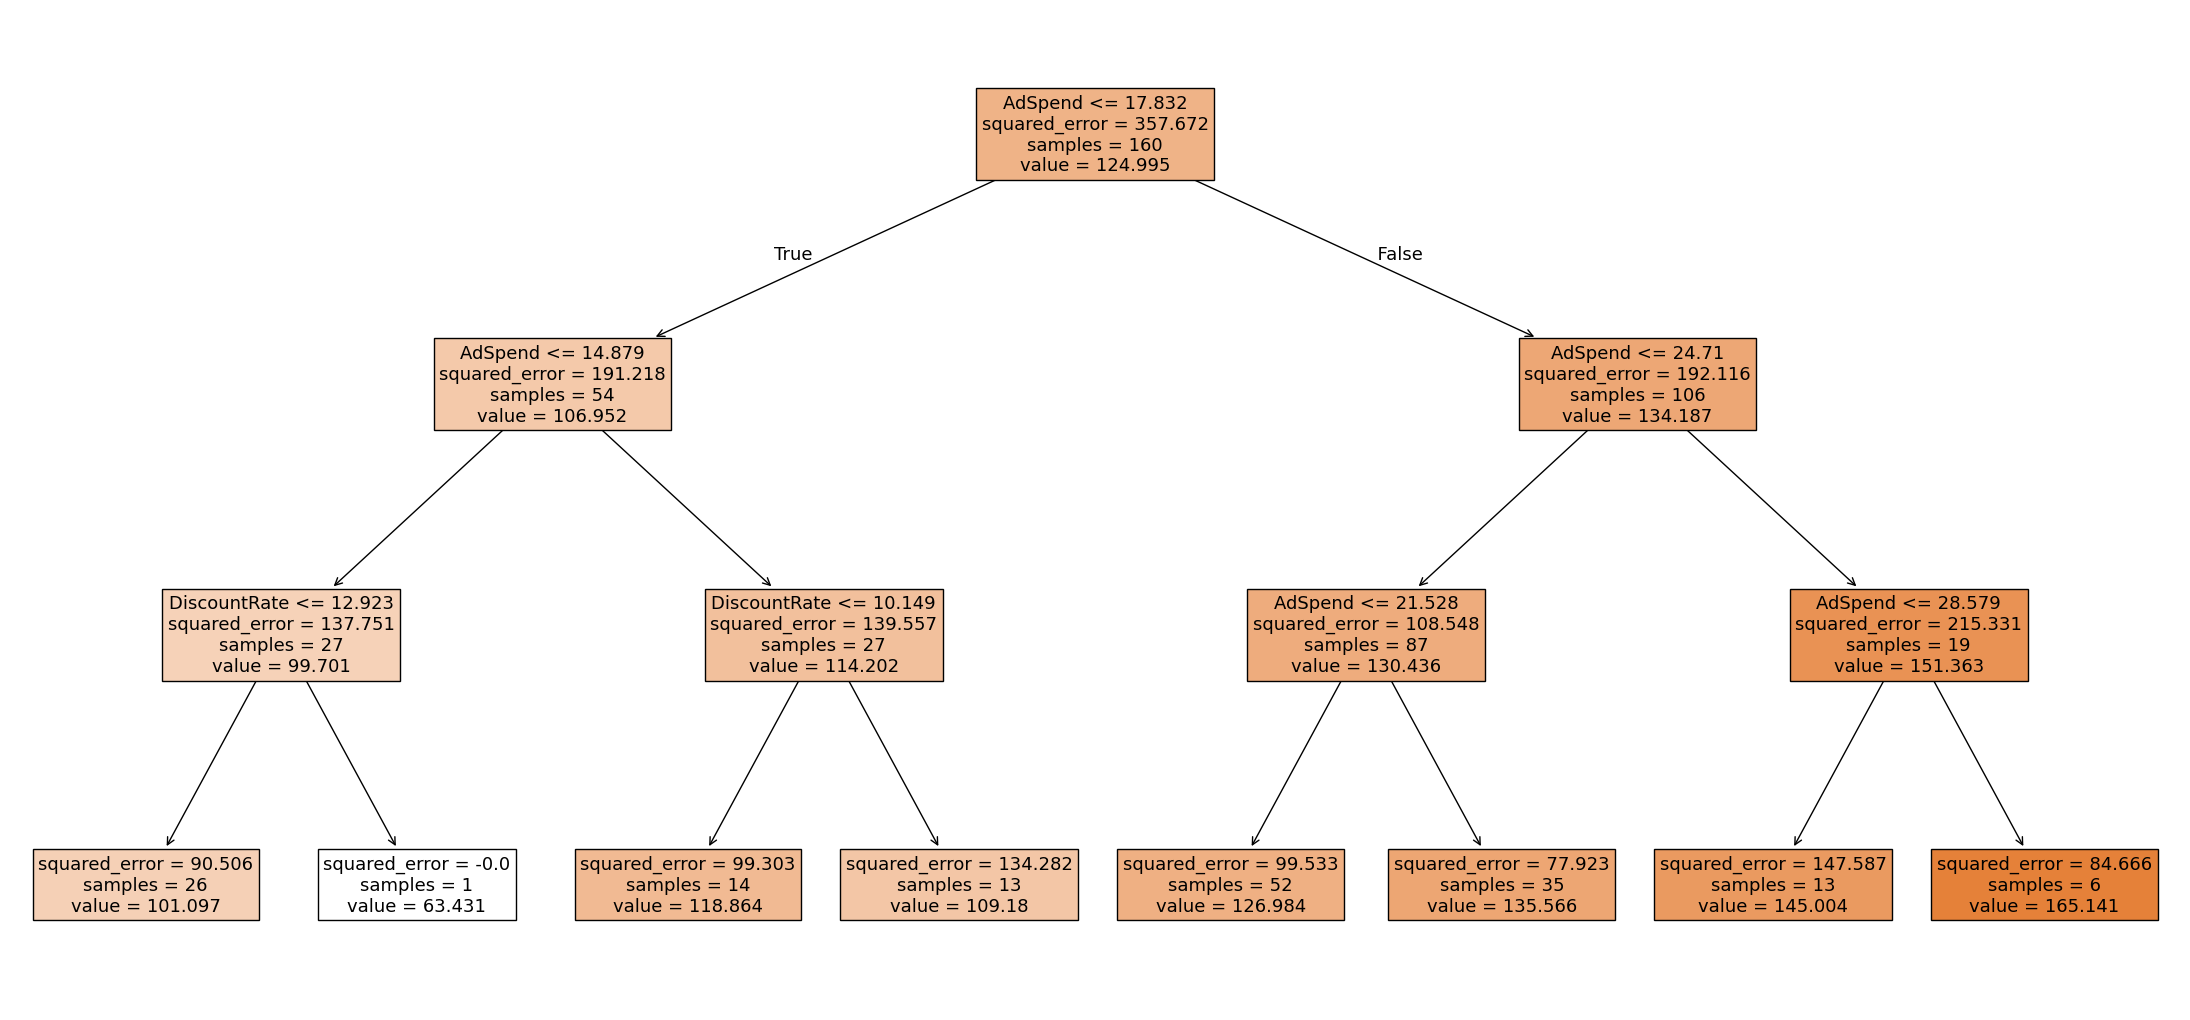

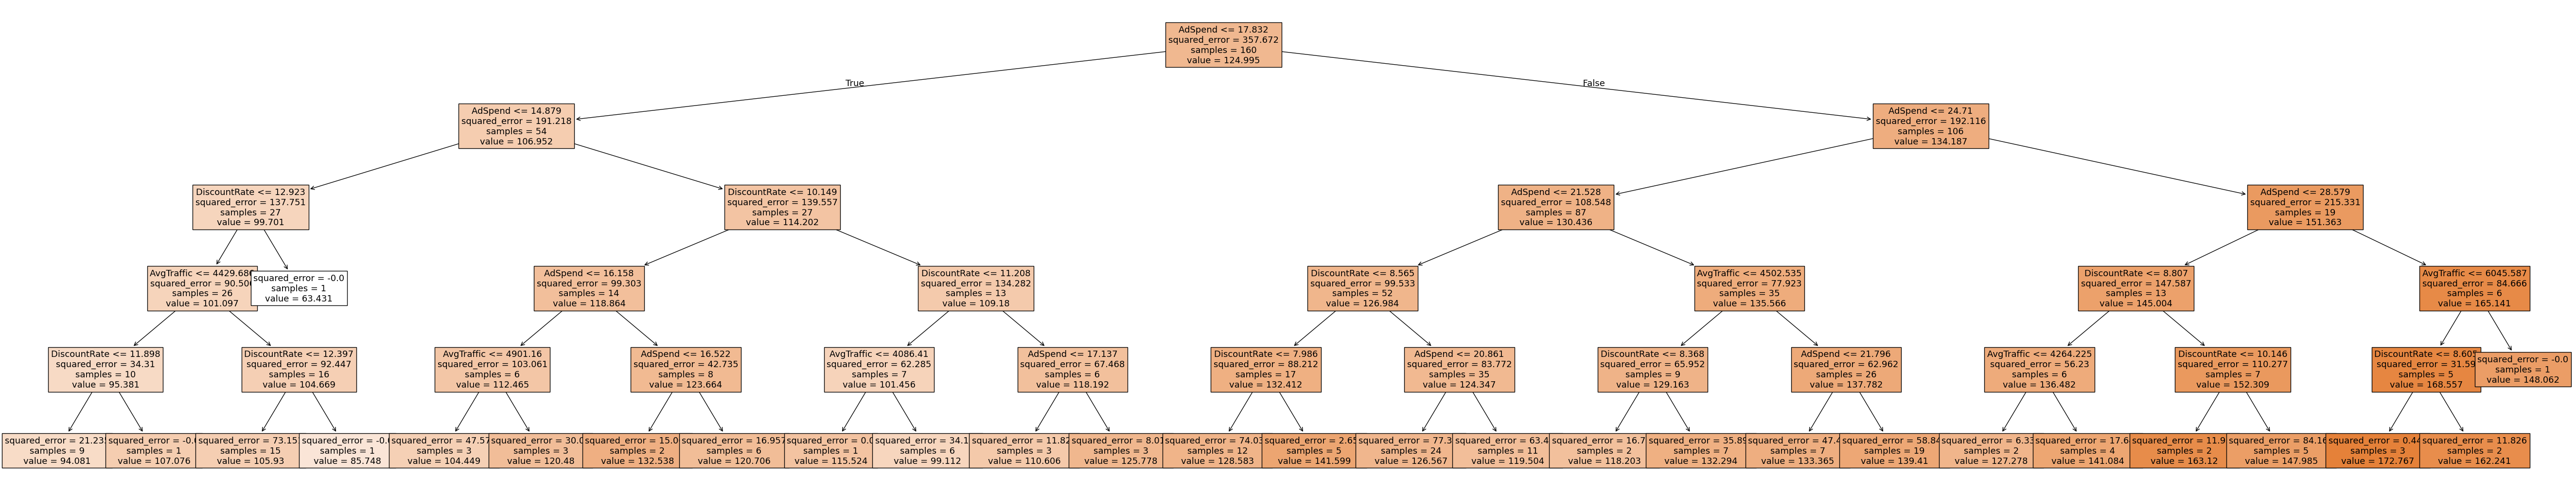

In [35]:
predictors = revenue_train[["AdSpend", "AvgTraffic", "DiscountRate"]]
X = pd.get_dummies(predictors, drop_first=True)
y = revenue_train["MonthlyRevenue"]
decision_tree = DecisionTreeRegressor(max_depth=2)
mod_tree = decision_tree.fit(X, y)
plt.figure(figsize=(28, 13))
plot_tree(decision_tree, feature_names=X.columns, fontsize=13, filled=True)
plt.show()

predictors = revenue_train[["AdSpend", "AvgTraffic", "DiscountRate"]]
X = pd.get_dummies(predictors, drop_first=True)
y = revenue_train["MonthlyRevenue"]
decision_tree = DecisionTreeRegressor(max_depth=3)
mod_tree = decision_tree.fit(X, y)
plt.figure(figsize=(28, 13))
plot_tree(decision_tree, feature_names=X.columns, fontsize=13, filled=True)
plt.show()

predictors = revenue_train[["AdSpend", "AvgTraffic", "DiscountRate"]]
X = pd.get_dummies(predictors, drop_first=True)
y = revenue_train["MonthlyRevenue"]
decision_tree = DecisionTreeRegressor(max_depth=5)
mod_tree = decision_tree.fit(X, y)
plt.figure(figsize=(68, 13))
plot_tree(decision_tree, feature_names=X.columns, fontsize=13, filled=True)
plt.show()


Part b. Find the in sample and out of sample R^2 for all three models. (you shouold have 6 R^2 in total).

In [42]:
from sklearn.metrics import mean_squared_error, r2_score

predictors = revenue_train[["AdSpend", "AvgTraffic", "DiscountRate"]]
X = pd.get_dummies(predictors, drop_first=True)
y = revenue_train["MonthlyRevenue"]
decision_tree = DecisionTreeRegressor(max_depth=2)
mod_tree = decision_tree.fit(X, y)
in_sample_tree = mod_tree.predict(X)
r2_tree_in = r2_score(y,in_sample_tree)
mod_tree2 = decision_tree.fit(X_train,y_train)
out_sample_tree = mod_tree2.predict(X_test)
r2_tree_out = r2_score(y_test,out_sample_tree)


predictors = revenue_train[["AdSpend", "AvgTraffic", "DiscountRate"]]
X = pd.get_dummies(predictors, drop_first=True)
y = revenue_train["MonthlyRevenue"]
decision_tree = DecisionTreeRegressor(max_depth=3)
mod_tree = decision_tree.fit(X, y)
in_sample_tree = mod_tree.predict(X)
r2_tree_in2 = r2_score(y,in_sample_tree)
mod_tree2 = decision_tree.fit(X_train,y_train)
out_sample_tree = mod_tree2.predict(X_test)
r2_tree_out2 = r2_score(y_test,out_sample_tree)


predictors = revenue_train[["AdSpend", "AvgTraffic", "DiscountRate"]]
X = pd.get_dummies(predictors, drop_first=True)
y = revenue_train["MonthlyRevenue"]
decision_tree = DecisionTreeRegressor(max_depth=5)
mod_tree = decision_tree.fit(X, y)
in_sample_tree = mod_tree.predict(X)
r2_tree_in3 = r2_score(y,in_sample_tree)
mod_tree2 = decision_tree.fit(X_train,y_train)
out_sample_tree = mod_tree2.predict(X_test)
r2_tree_out3 = r2_score(y_test,out_sample_tree)




print(f"Model 2 Depth r2 in:{r2_tree_in}")
print(f'Model 2 Depth r2 out: {r2_tree_out}')
print(f"Model 3 Depth r2 in:{r2_tree_in2}")
print(f'Model 3 Depth r2 out: {r2_tree_out2}')
print(f"Model 5 Depth r2 in:{r2_tree_in3}")
print(f'Model 5 Depth r2 out: {r2_tree_out3}')


Model 2 Depth r2 in:0.6326532974267691
Model 2 Depth r2 out: 0.41797850725447316
Model 3 Depth r2 in:0.723581857947516
Model 3 Depth r2 out: 0.48770782512838073
Model 5 Depth r2 in:0.8660973979007532
Model 5 Depth r2 out: 0.4614538760591532


Part c. Use these R^2 values in terms of detecting to detect any underfitting or overfitting in the models.

Model with 2 depth is slightly underfit because the new data prediction is 42% and the training data is only 63%. Model 3 is the best option since the r2 out is 49% and the training data is 72%. Model 5 is overfitting since the training data is great at 87%, but the r2 out is only 46%.